<a href="https://colab.research.google.com/github/Sreejith-CG/Machine-Learning/blob/main/KNN_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

df=pd.read_csv("/content/Iris.csv")
newdf=df.drop(["Id"],axis=1)
newdf



,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
col=newdf.columns
col

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
head=newdf.head()
head

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
newdf.shape

(150, 5)

In [ ]:
print(newdf.isna().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
x=newdf.iloc[:,:-1].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y=newdf.iloc[:,-1].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)
x_train

array([[6.2, 2.9, 4.3, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [6. , 2.2, 4. , 1. ],
       [7.3, 2.9, 6.3, 1.8],
       [5.2, 2.7, 3.9, 1.4],
       [5.5, 2.4, 3.7, 1. ],
       [6. , 3.4, 4.5, 1.6],
       [6.8, 3. , 5.5, 2.1],
       [5.1, 3.8, 1.6, 0.2],
       [6.7, 2.5, 5.8, 1.8],
       [5.8, 2.6, 4. , 1.2],
       [5.1, 3.5, 1.4, 0.3],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3.4, 1.5, 0.2],
       [6.3, 2.5, 4.9, 1.5],
       [6. , 2.9, 4.5, 1.5],
       [5. , 3.6, 1.4, 0.2],
       [6.3, 2.7, 4.9, 1.8],
       [5.1, 3.3, 1.7, 0.5],
       [6.2, 3.4, 5.4, 2.3],
       [7.9, 3.8, 6.4, 2. ],
       [5.6, 2.7, 4.2, 1.3],
       [6.3, 2.9, 5.6, 1.8],
       [6.4, 3.2, 5.3, 2.3],
       [5.7, 2.9, 4.2, 1.3],
       [4.9, 3. , 1.4, 0.2],
       [6.7, 3. , 5.2, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [6.4, 2.9, 4.3, 1.3],
       [5.7, 2.8, 4.5, 1.3],
       [5.4, 3.7, 1.5, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [6.5, 3. , 5.8, 2.2],
       [5.7, 2.8, 4.1, 1.3],
       [4.8, 3

In [ ]:
#standard scaler z=(x-u)/s  u=mean of training data   s=standarad deviation of training data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_test

array([[-1.21319334,  0.04149771, -1.32570357, -1.49794713],
       [ 1.27966968,  0.25936066,  1.10824844,  1.41718166],
       [ 2.27681489, -0.61209116,  1.68776083,  1.0196641 ],
       [-0.58997758,  0.69508657, -1.20980109, -1.36544128],
       [ 1.65359914,  1.13081248,  1.3400534 ,  1.68219337],
       [-1.83640909, -0.17636525, -1.44160604, -1.36544128],
       [ 0.40716763, -0.61209116,  0.5866873 ,  0.75465239],
       [-0.21604813,  1.56653839, -1.20980109, -1.23293542],
       [ 1.15502653, -0.61209116,  0.5866873 ,  0.22462897],
       [-1.46247964,  0.25936066, -1.44160604, -1.36544128],
       [ 0.28252448, -0.3942282 ,  0.52873606,  0.22462897],
       [ 0.28252448, -1.04781707,  1.05029721,  0.22462897],
       [-1.33783649,  0.04149771, -1.26775233, -1.36544128],
       [ 0.65645393,  0.25936066,  0.41283358,  0.35713483],
       [-1.46247964,  0.25936066, -1.26775233, -1.36544128],
       [ 0.53181078, -1.70140594,  0.35488235,  0.09212312],
       [-1.21319334,  0.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(y_pred)
print(classifier.predict([[555, 38, 179, 4]]))

['Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor']
['Iris-virginica']


[[16  0  0]
 [ 0 14  2]
 [ 0  0 13]]
0.9555555555555556


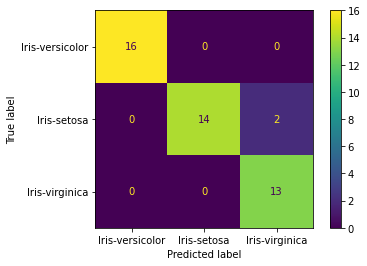

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay
labels=['Iris-versicolor','Iris-setosa','Iris-virginica']
#cm=ConfusionMatrixDisplay()
result=confusion_matrix(y_pred,y_test)
cm=ConfusionMatrixDisplay(result,display_labels=labels)
cm.plot()
score=accuracy_score(y_test,y_pred)
print(result)
print(score)
